# Model

First, declare functions that will be used to analyse the variables and to create the model.

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
sb.set_theme()

data = pd.read_csv("../data/movies_with_vars.csv")

def performLinearRegression (data, predictor, response):
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)
    
    # Create a Linear Regression object
    linreg = LinearRegression()

    # Train the Linear Regression model
    linreg.fit(predictor_train, response_train)

    # Coefficients of the Linear Regression line
    b = linreg.intercept_
    a = linreg.coef_

    print('Intercept \t: b = ', b)
    print('Coefficients \t: a = ', a)
    print('R^2', linreg.score(predictor_train, response_train))

    response_train_pred = linreg.predict(predictor_train)
    response_test_pred = linreg.predict(predictor_test)
    
    # Plot the Linear Regression line
    f, axes = plt.subplots(1, 2, figsize=(16, 8))
    axes[0].scatter(response_train, response_train_pred)
    axes[0].plot(response_train, response_train, 'w-', linewidth = 1)
    axes[0].set_xlabel(predictor.columns[0])
    axes[0].set_ylabel(response.columns[0])
    axes[1].scatter(response_test, response_test_pred)
    axes[1].plot(response_train, response_train, 'w-', linewidth = 1)
    axes[1].set_xlabel(predictor.columns[0])
    axes[1].set_ylabel(response.columns[0])
    plt.show()
    
    return linreg, predictor_train, predictor_test, response_train, response_test

def generateClassificationTree(data, predictorName,responseName, depth, class_names):
    print(f'{predictorName} vs. {responseName} with depth {depth}')
    response = pd.DataFrame(data[responseName]) # Response
    predictor = pd.DataFrame(data[predictorName]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a joint dataframe by concatenating Predictor and Response
    trainDF = pd.concat([predictor_train, response_train], axis = 1).reindex(predictor_train.index)

    # Joint Boxplot of Predictor Train against Response Train
    plt.figure(figsize=(12, 4))
    sb.swarmplot(x = predictorName, y = responseName, data = trainDF, orient = "h")

    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = depth)

    # Train the Decision Tree Classifier model
    dectree.fit(predictor, response)

    plt.figure(figsize=(16,16))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=[predictorName], 
          class_names=class_names)

    # Print the Classification Accuracy
    print("Train Classification Accuracy \t:", dectree.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", dectree.score(predictor_test, response_test))

    response_train_pred = dectree.predict(predictor_train)
    response_test_pred = dectree.predict(predictor_test)
    
    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}

def generateConfusionMatrix(response, response_pred, title):
    print(title)
    plt.figure(figsize=(6,6))
    plt.title(title)
    sb.heatmap(confusion_matrix(response, response_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    # find false positive and false negative from confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(response, response_pred).ravel()
    print(f'True Positive Rate: {true_positive/(true_positive+false_negative)}')
    print(f'False Positive Rate: {false_positive/(false_positive+true_negative)}')
    print(f'True Negative Rate: {true_negative/(true_negative+false_positive)}')
    print(f'False Negative Rate: {false_negative/(false_negative+true_positive)}')
    
def generatePredictVsTruePlot(response, response_pred, title):
    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.scatter(response, response_pred, color = "blue")
    plt.plot(response, response, 'w-', linewidth = 1)
    plt.xlabel("True values of the Response Variable (Train)")
    plt.ylabel("Predicted values of the Response Variable (Train)")
    plt.show()
    
def generateRandomForestClassifier(data, predictor, response, n_estimators, depth):
    print(f'{predictor} vs. {response} with depth {depth}')
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a Decision Tree Classifier object
    random_forest = RandomForestClassifier(n_estimators = n_estimators, max_depth = depth)

    # Train the Decision Tree Classifier model
    random_forest.fit(predictor_train, response_train.values.ravel())

    # Print the Train and Test Classification Accuracy
    print("Train Classification Accuracy \t:", random_forest.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", random_forest.score(predictor_test, response_test))

    response_train_pred = random_forest.predict(predictor_train)
    response_test_pred = random_forest.predict(predictor_test)

    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}

def generateRandomForestRegressor(data, predictor, response, n_estimators, random_state):
    print(f'{predictor} vs. {response}')
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a Decision Tree Regressor object
    random_forest = RandomForestRegressor(n_estimators = n_estimators, random_state = random_state)

    # Train the Decision Tree Classifier model
    random_forest.fit(predictor_train, response_train.values.ravel())

    response_train_pred = random_forest.predict(predictor_train)
    response_test_pred = random_forest.predict(predictor_test)
    
    # Print the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", random_forest.score(predictor_train, response_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(response_train, response_train_pred))
    print()

    # Print the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", random_forest.score(predictor_test, response_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(response_test, response_test_pred))
    print()

    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}
   

# Linear Regression

## Predictor vs. Vote Average

Intercept 	: b =  [6.41913298]
Coefficients 	: a =  [[0.2164337]]
R^2 0.004928725994239436


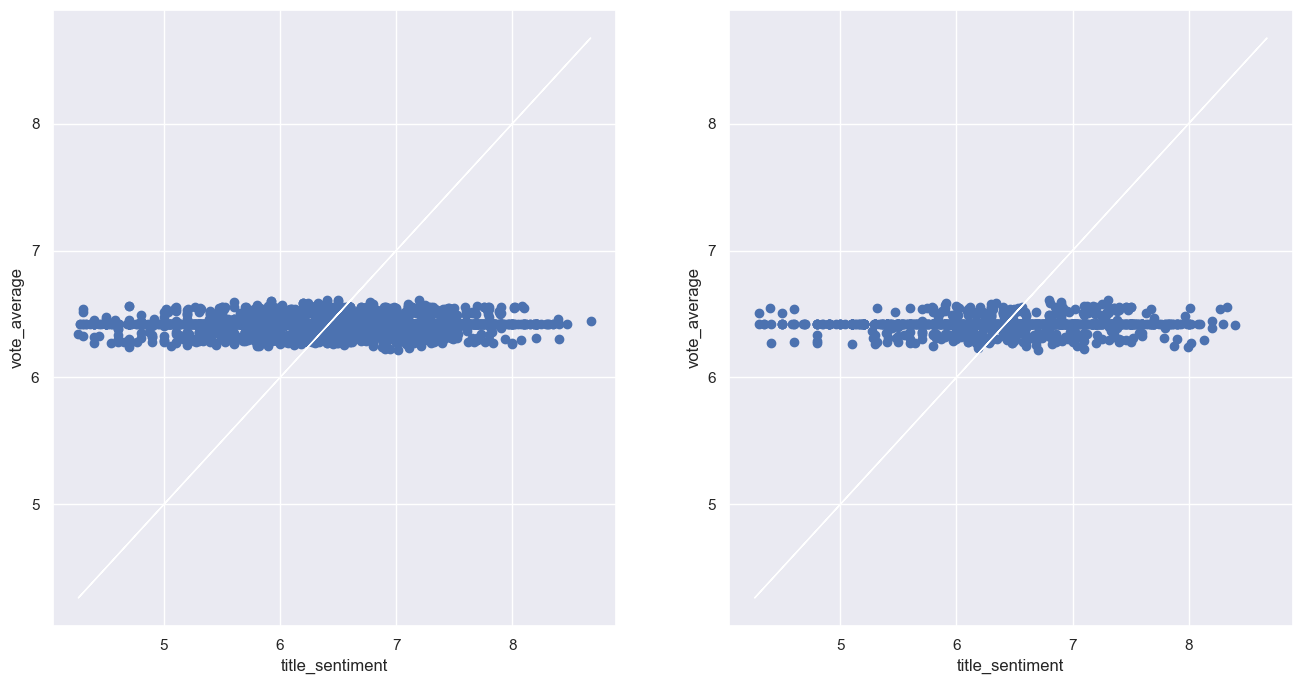

Intercept 	: b =  [6.42682984]
Coefficients 	: a =  [[0.13134989]]
R^2 0.012059470309727538


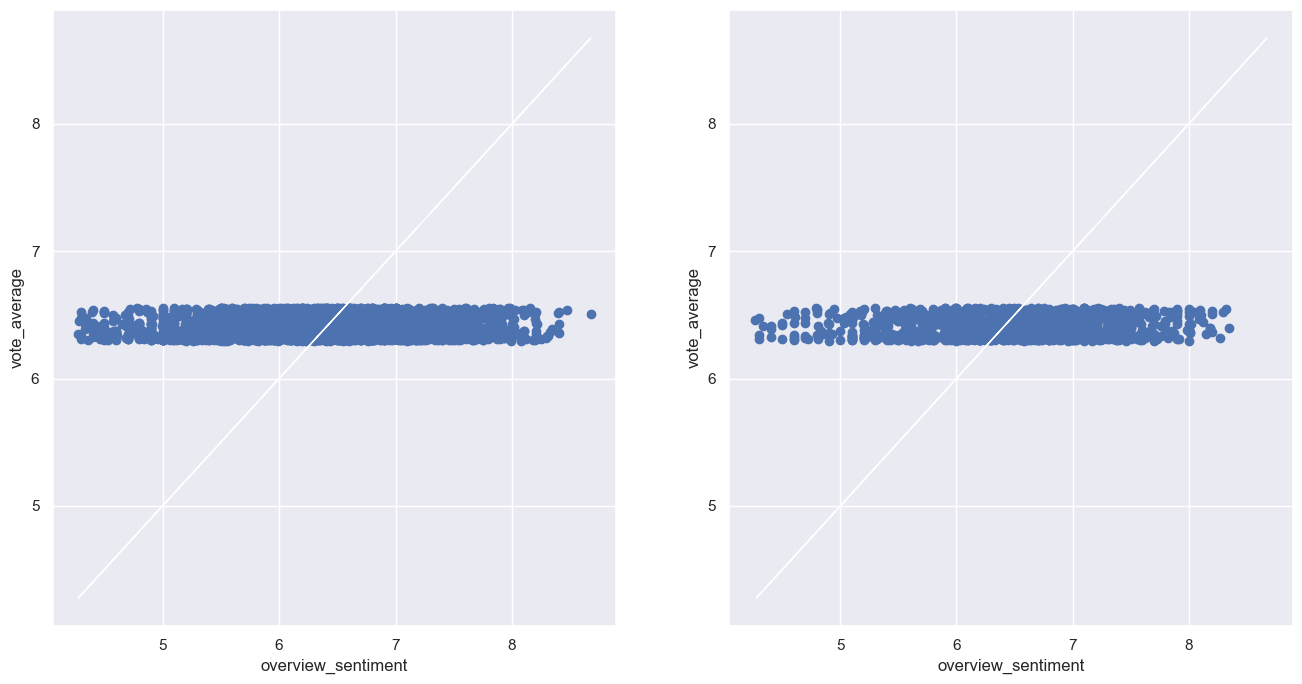

Intercept 	: b =  [6.33194635]
Coefficients 	: a =  [[0.00553258]]
R^2 0.004968164750923876


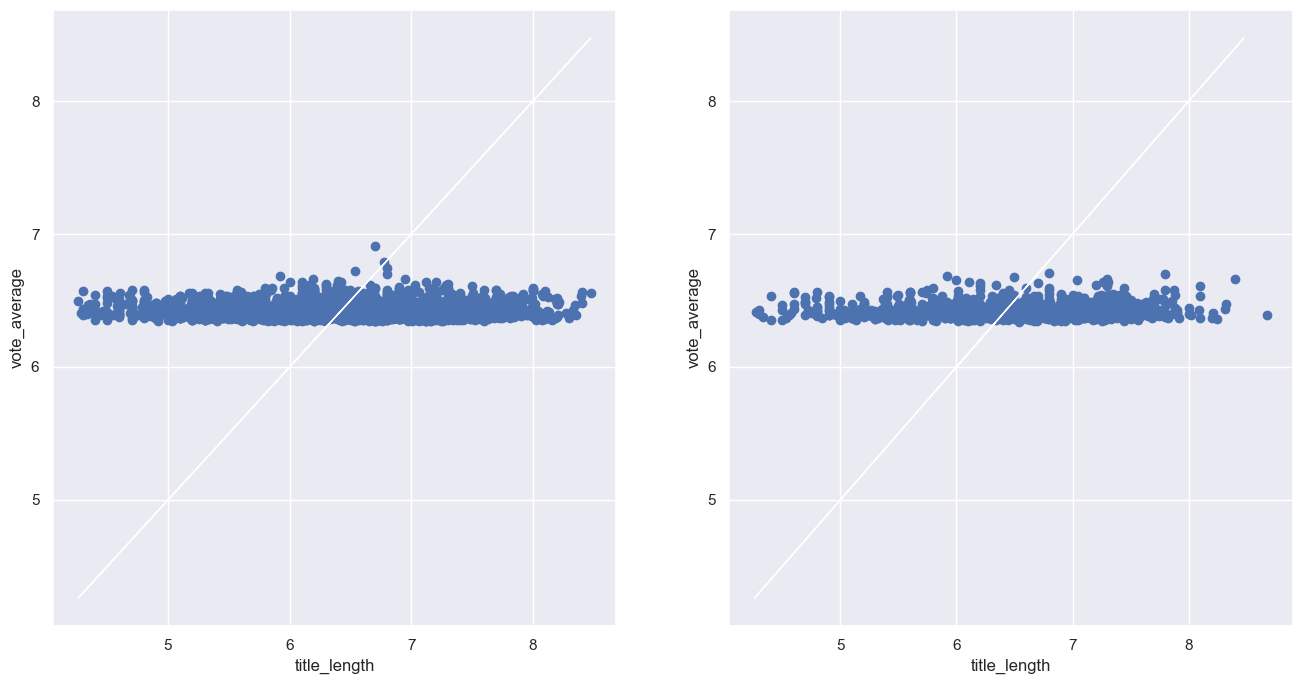

Intercept 	: b =  [6.33949982]
Coefficients 	: a =  [[0.02918201]]
R^2 0.004653513674923171


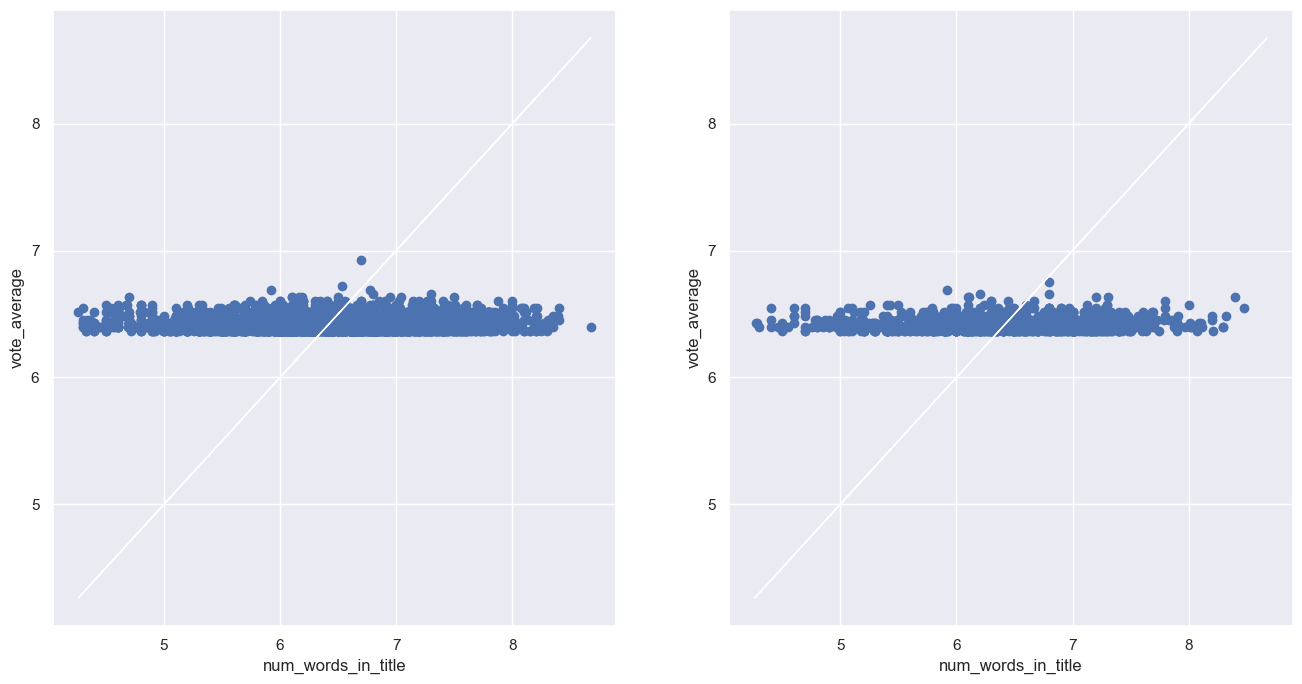

Intercept 	: b =  [6.46543229]
Coefficients 	: a =  [[-0.00694779]]
R^2 0.0002836857744852317


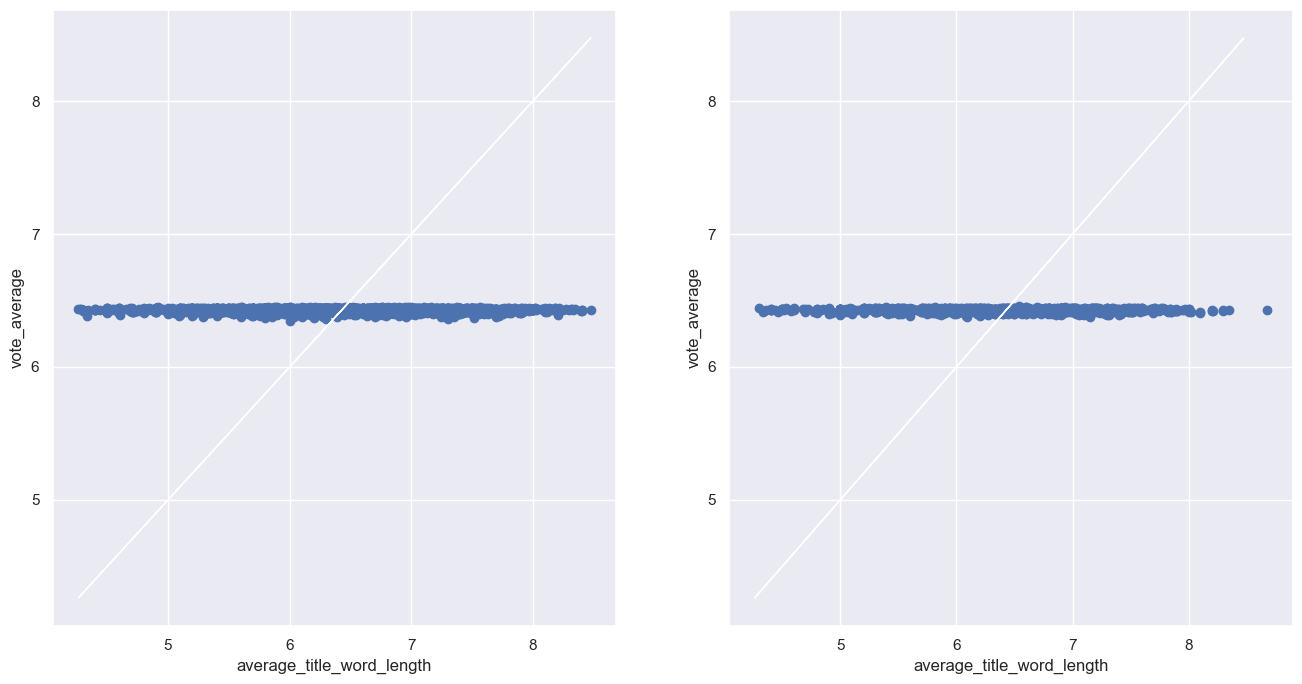

Intercept 	: b =  [6.41559434]
Coefficients 	: a =  [[0.08317719]]
R^2 0.0022071894677940795


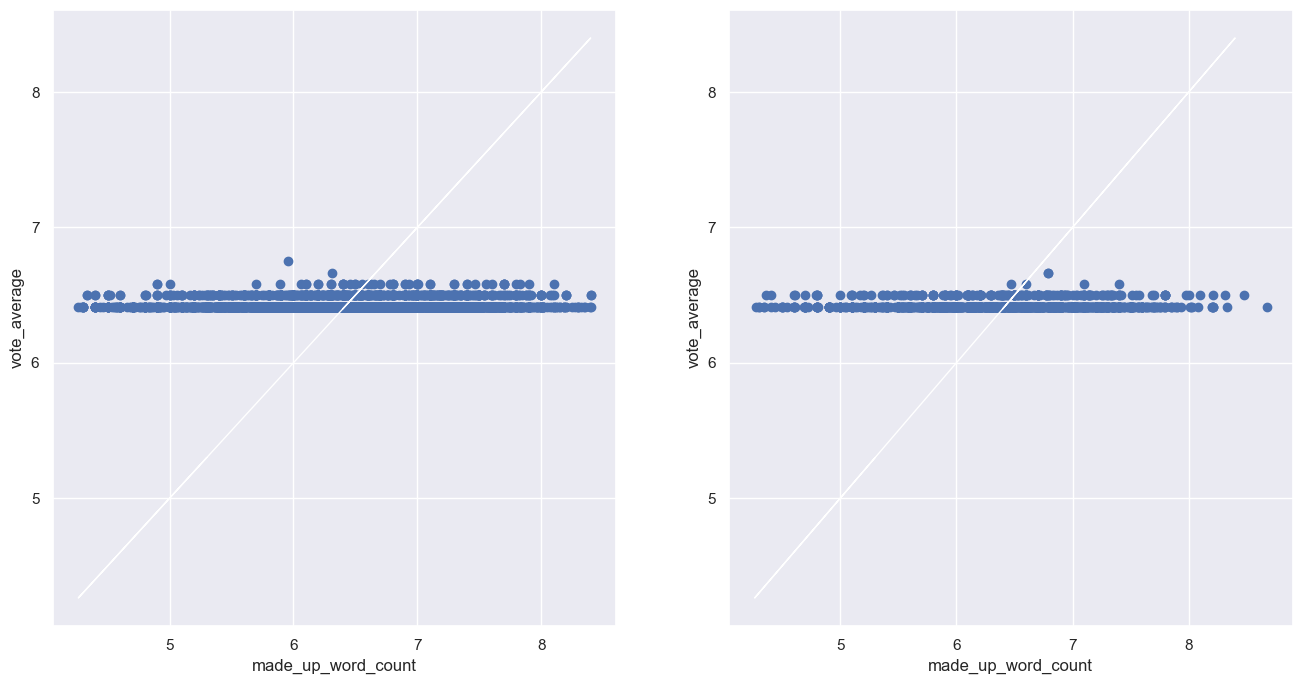

In [92]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'vote_average')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'vote_average')
title_length_linreg = performLinearRegression(data, 'title_length', 'vote_average')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'vote_average')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'vote_average')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'vote_average')

## Multi-Variate Predictor vs. Vote Average

Intercept 	: b =  [6.42265281]
Coefficients 	: a =  [[ 0.15403498  0.08271821  0.00499182 -0.00940455 -0.01075361  0.07493249]]
R^2 0.014407991206539905


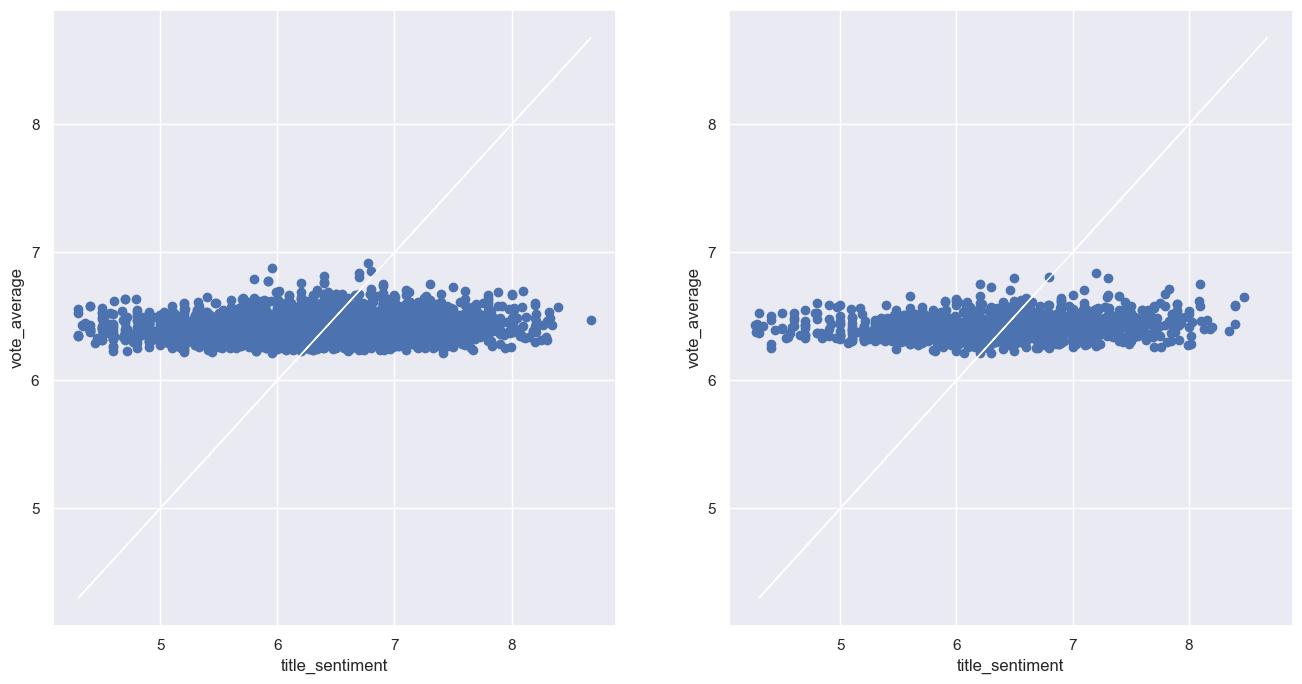

In [95]:
multi_variate_linreg = performLinearRegression(data, ['title_sentiment','overview_sentiment','title_length','num_words_in_title','average_title_word_length','made_up_word_count'], 'vote_average')

## Predictor vs. Popularity

Intercept 	: b =  [21.00324869]
Coefficients 	: a =  [[-0.10853956]]
R^2 2.1436714617517616e-05


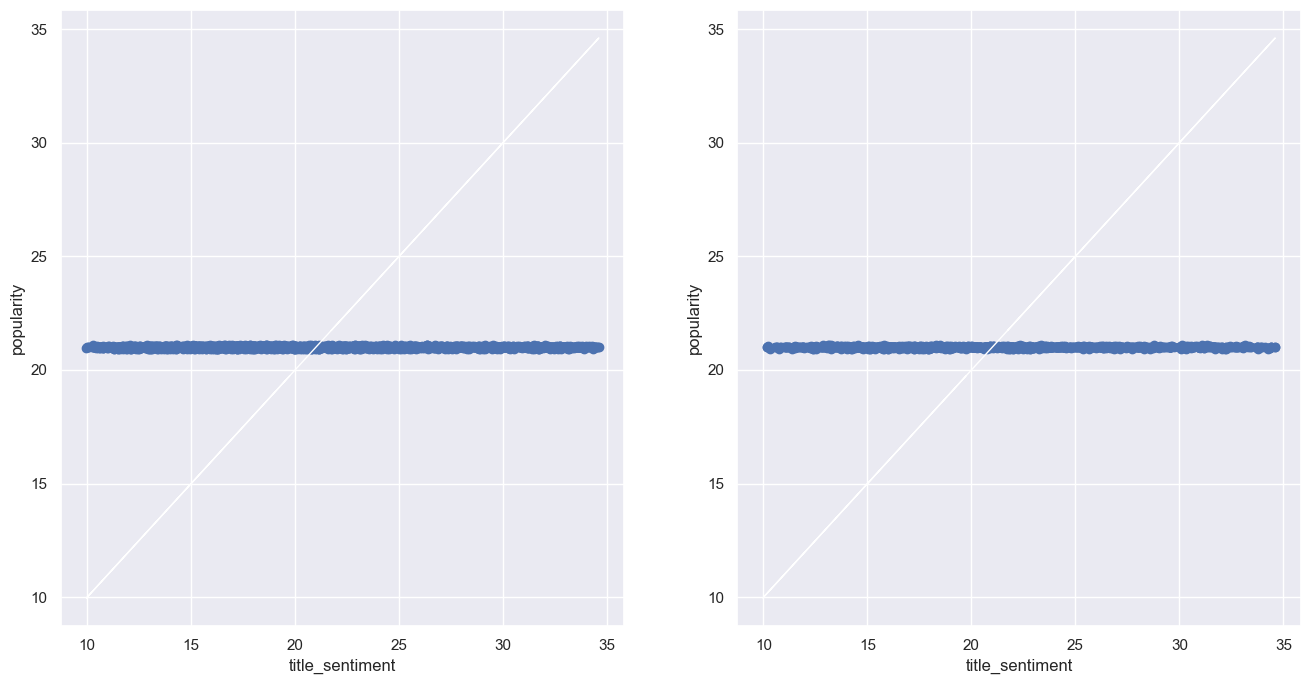

Intercept 	: b =  [21.07113118]
Coefficients 	: a =  [[-0.30796084]]
R^2 0.0011160510900712906


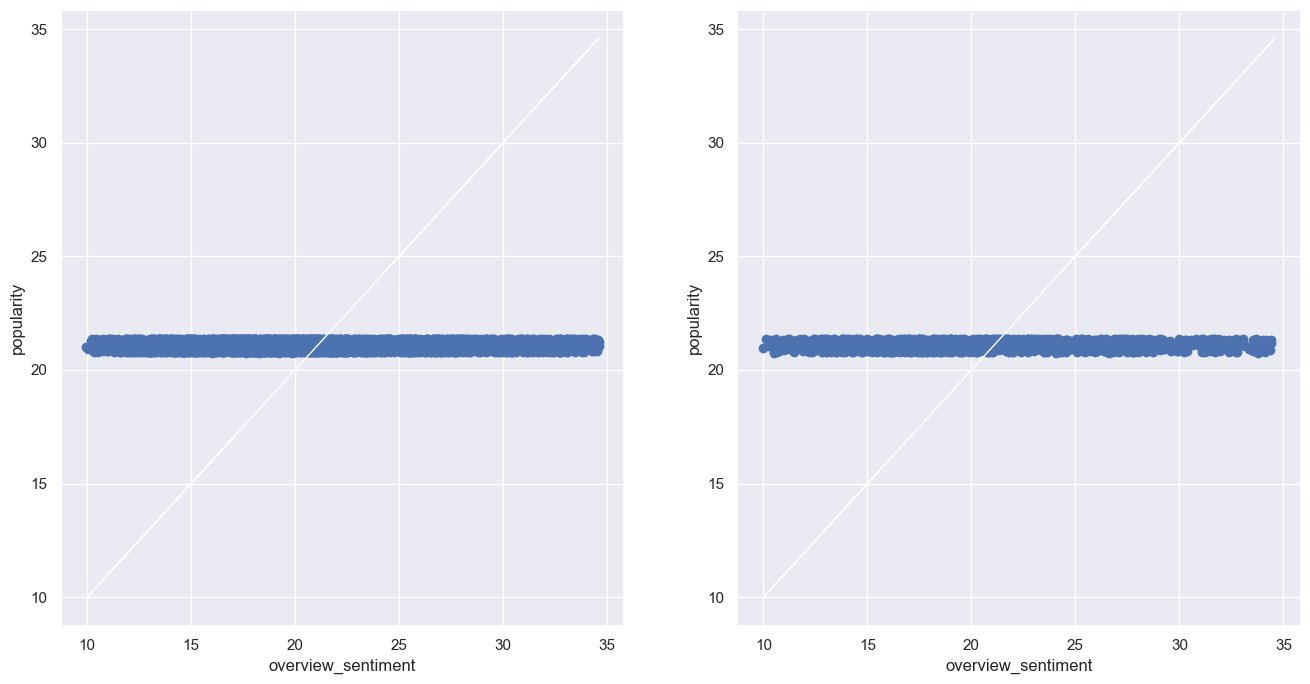

Intercept 	: b =  [20.99432102]
Coefficients 	: a =  [[-0.00352713]]
R^2 3.4665222046093014e-05


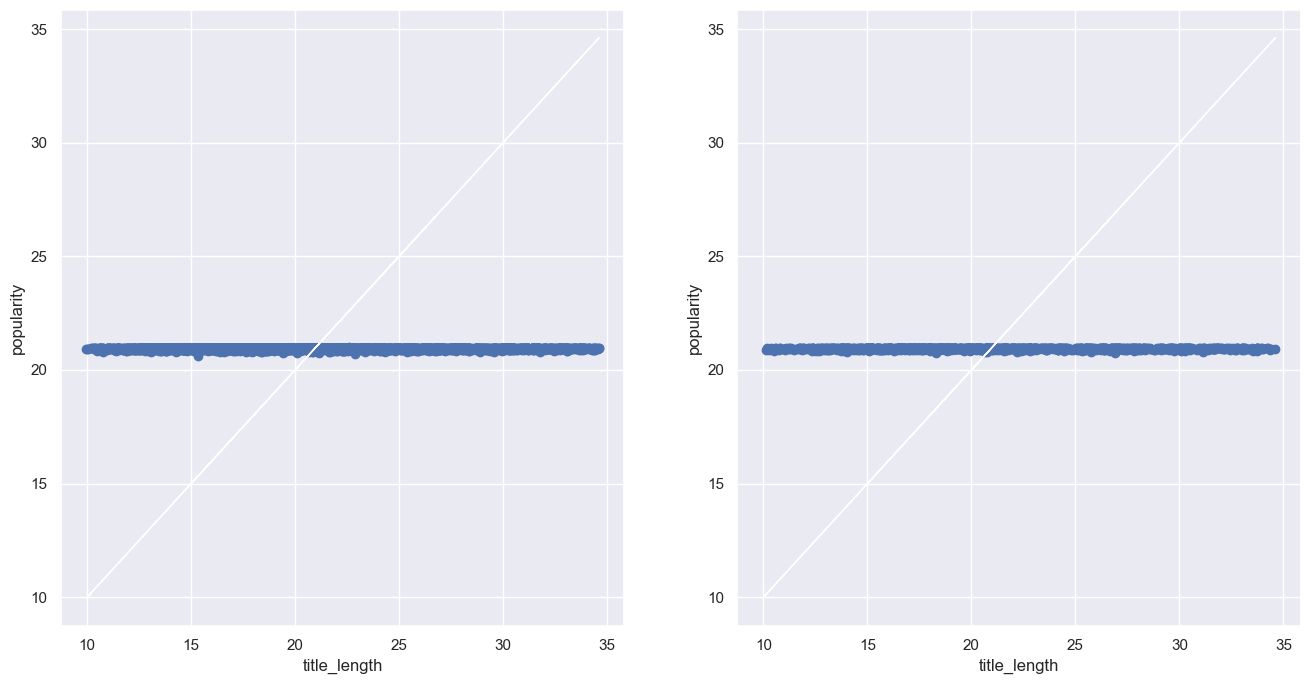

Intercept 	: b =  [20.97136943]
Coefficients 	: a =  [[0.00381262]]
R^2 1.3907416287484153e-06


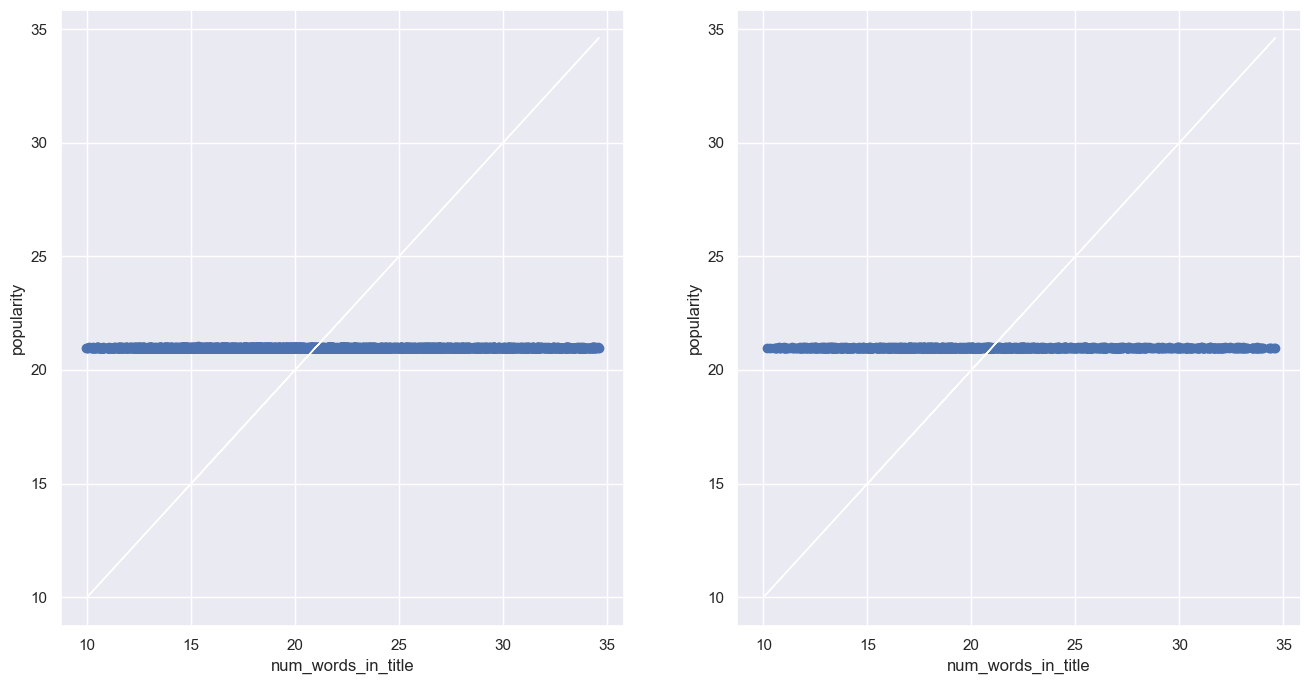

Intercept 	: b =  [20.7868008]
Coefficients 	: a =  [[0.04475549]]
R^2 0.00018997926599573223


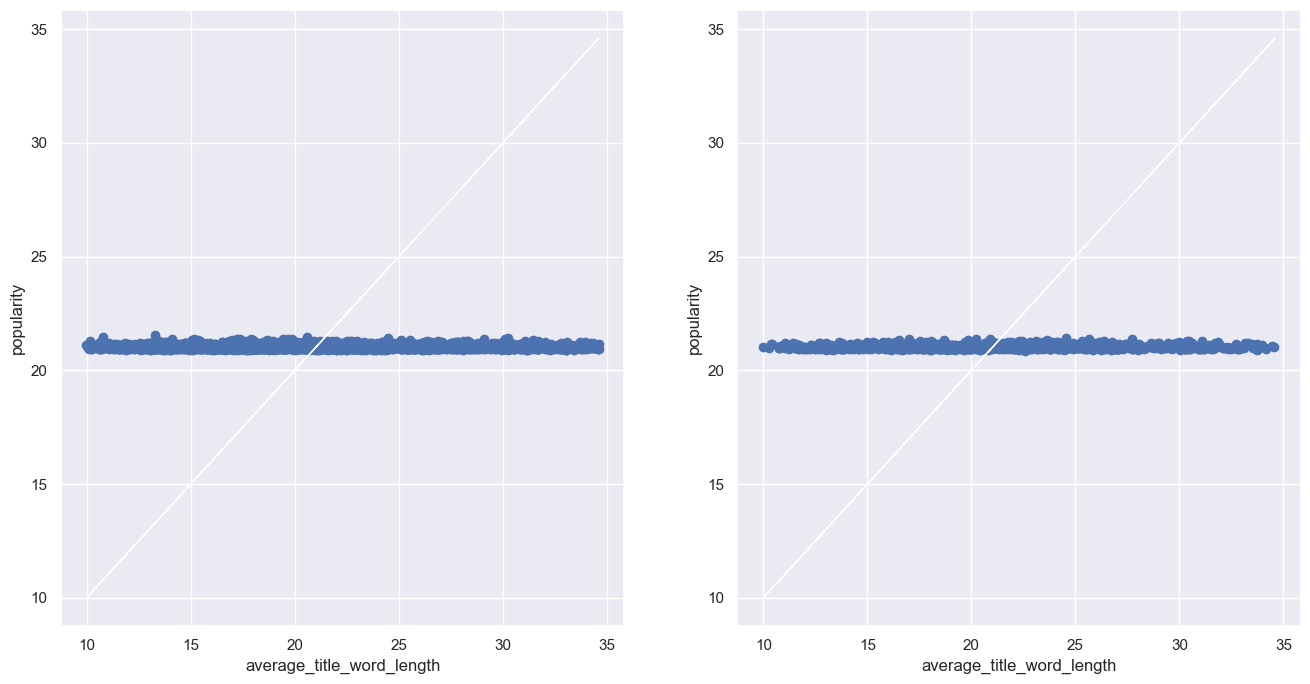

Intercept 	: b =  [20.97774751]
Coefficients 	: a =  [[0.17632079]]
R^2 0.00016021727692727694


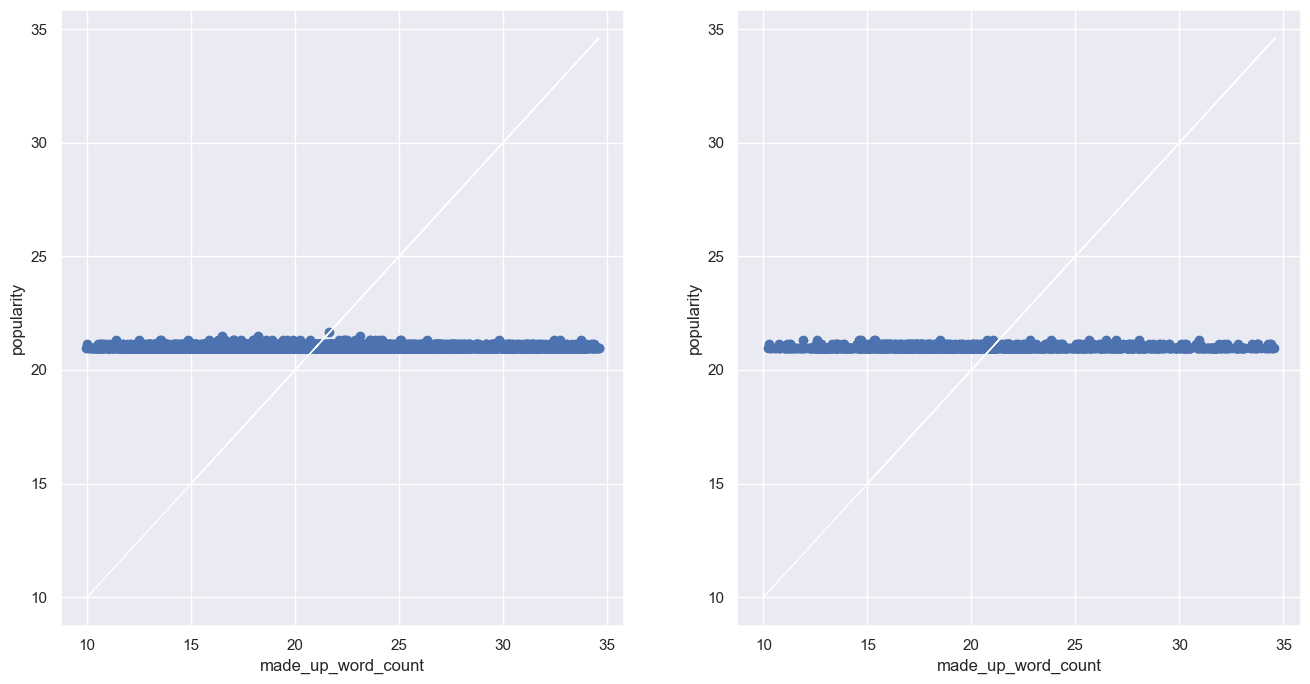

In [104]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'popularity')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'popularity')
title_length_linreg = performLinearRegression(data, 'title_length', 'popularity')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'popularity')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'popularity')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'popularity')

## Multi-Variate Predictor vs. Popularity

Intercept 	: b =  [20.26898276]
Coefficients 	: a =  [[-0.25369845 -0.03624149 -0.09941453  0.50049268  0.14756274  0.22851998]]
R^2 0.0018938720568897338


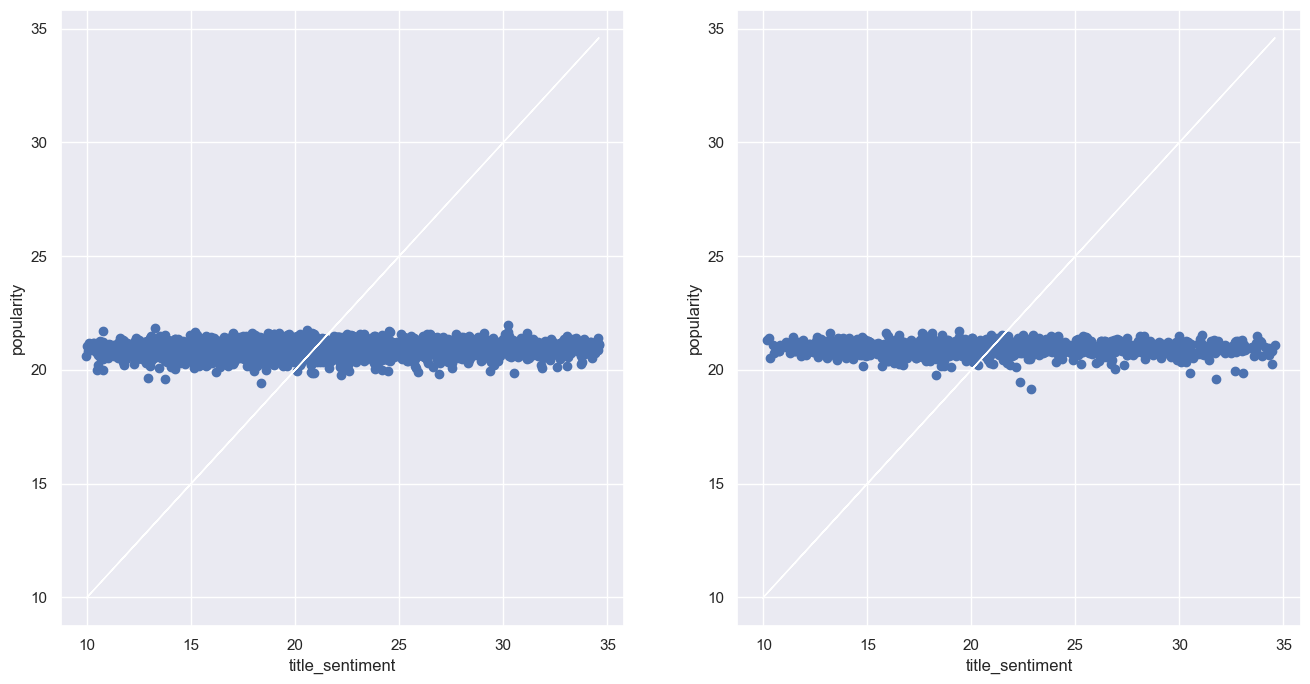

In [99]:
multi_variate_linreg = performLinearRegression(data, ['title_sentiment','overview_sentiment','title_length','num_words_in_title','average_title_word_length','made_up_word_count'], 'popularity')

# Random Forest Regressor

## Predictor vs. Vote Average

title_sentiment vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.043984730063901134
Mean Squared Error (MSE) 	: 0.5518328171304134

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.017834796699911504
Mean Squared Error (MSE) 	: 0.5490665131229652



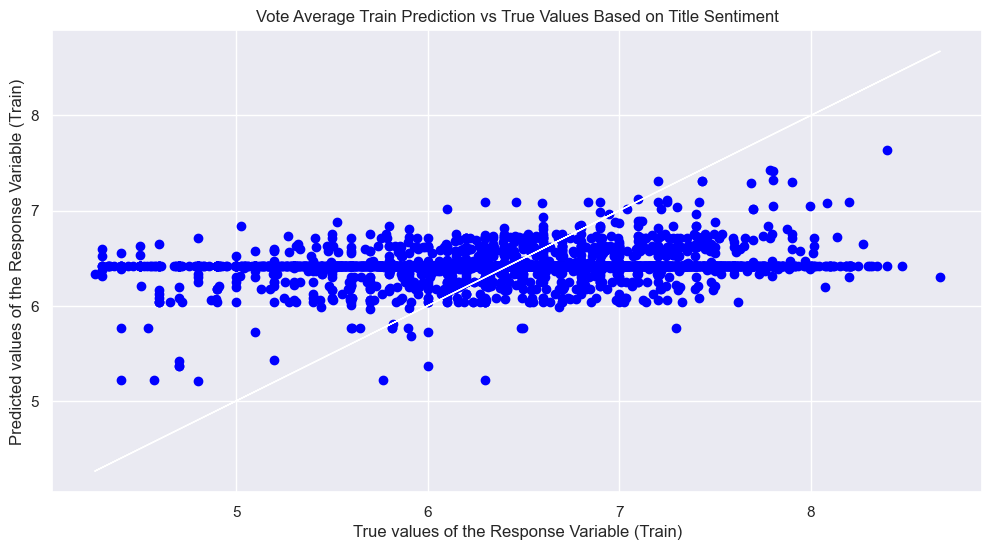

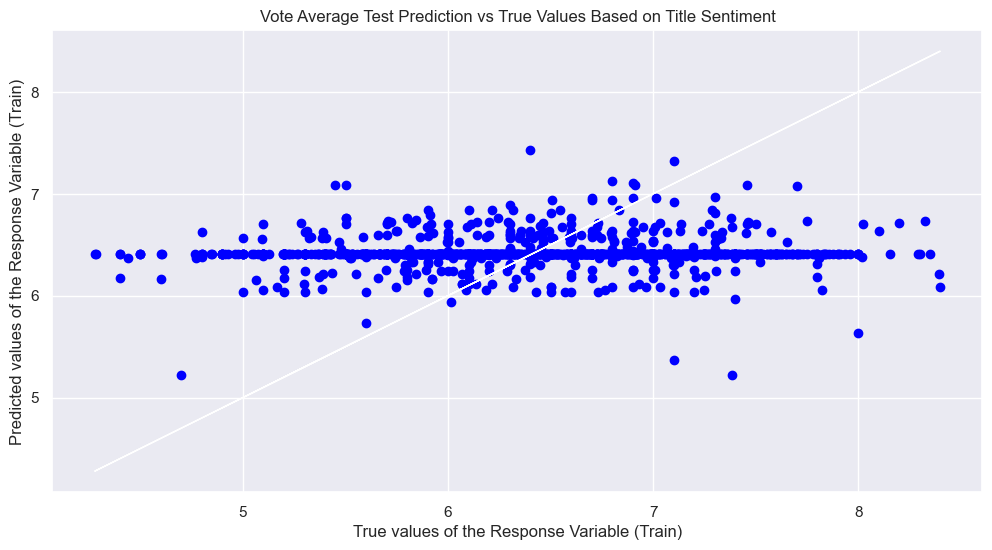

overview_sentiment vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2181547607901947
Mean Squared Error (MSE) 	: 0.44646156772143225

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.12365975654249461
Mean Squared Error (MSE) 	: 0.626999565050101



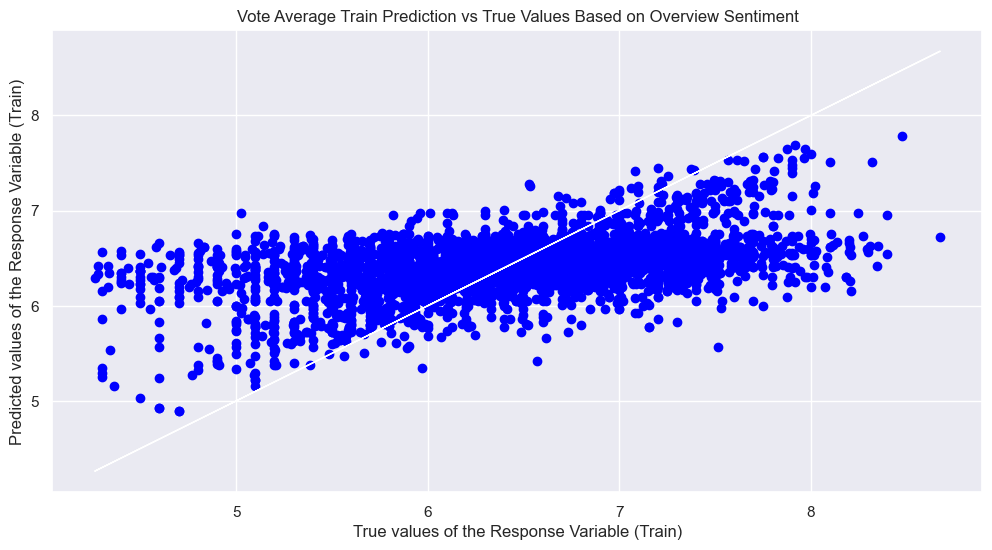

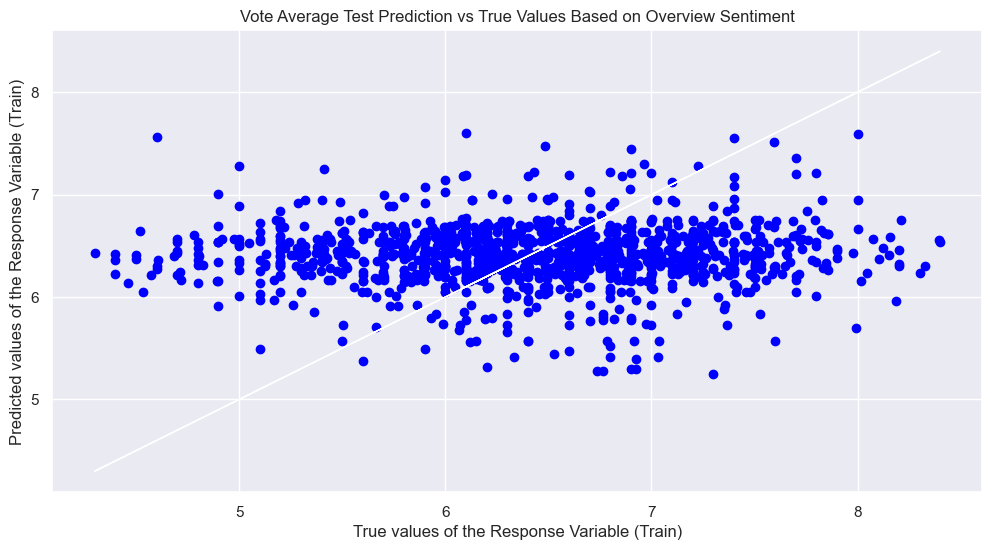

title_length vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.02225265053449965
Mean Squared Error (MSE) 	: 0.5614401616343593

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0034604446300308123
Mean Squared Error (MSE) 	: 0.5501274193944143



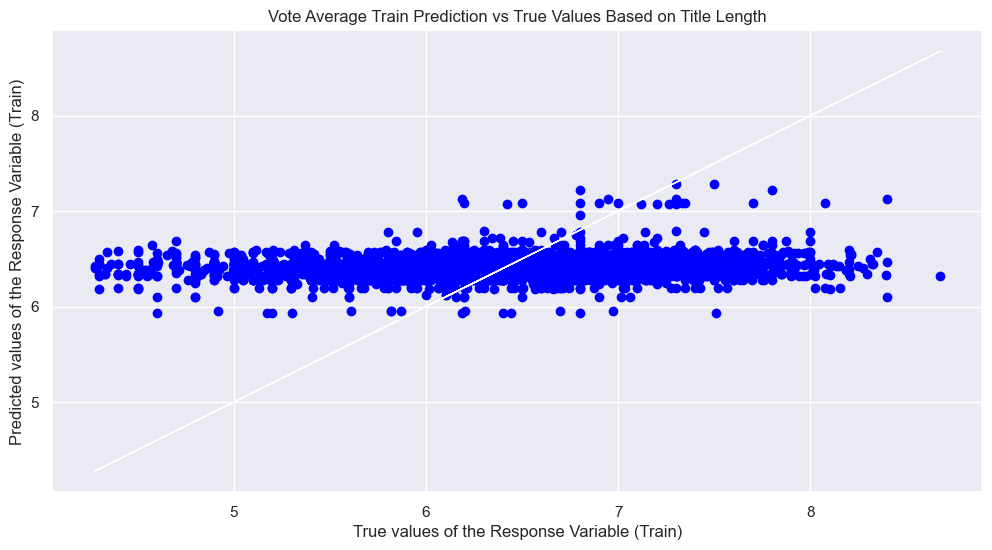

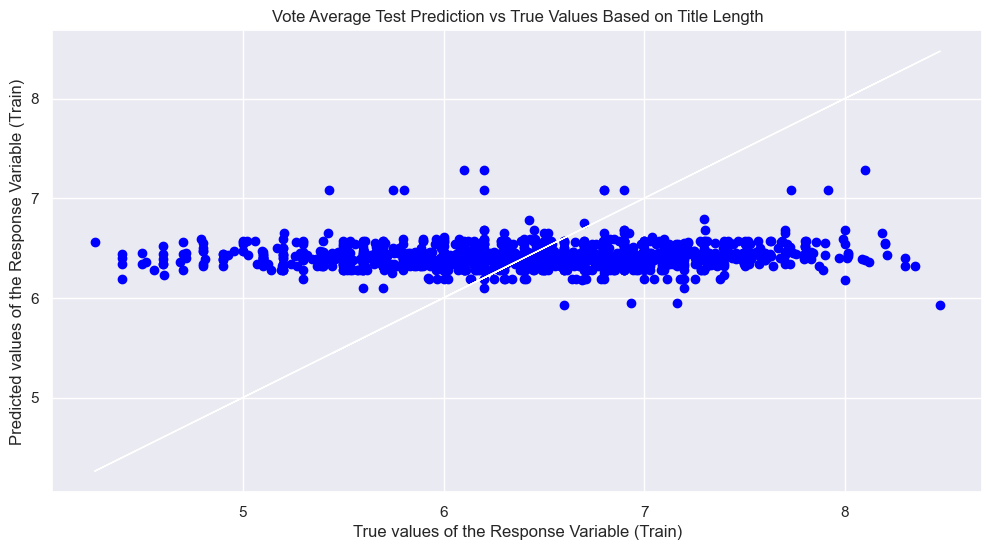

num_words_in_title vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.010296620872705886
Mean Squared Error (MSE) 	: 0.5609996621123651

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0010836719149940333
Mean Squared Error (MSE) 	: 0.569735800580099



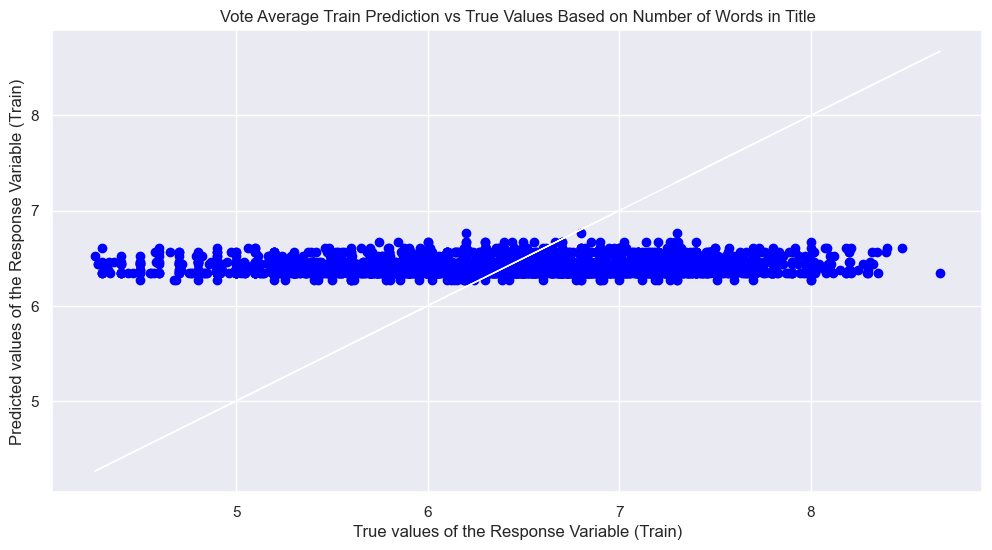

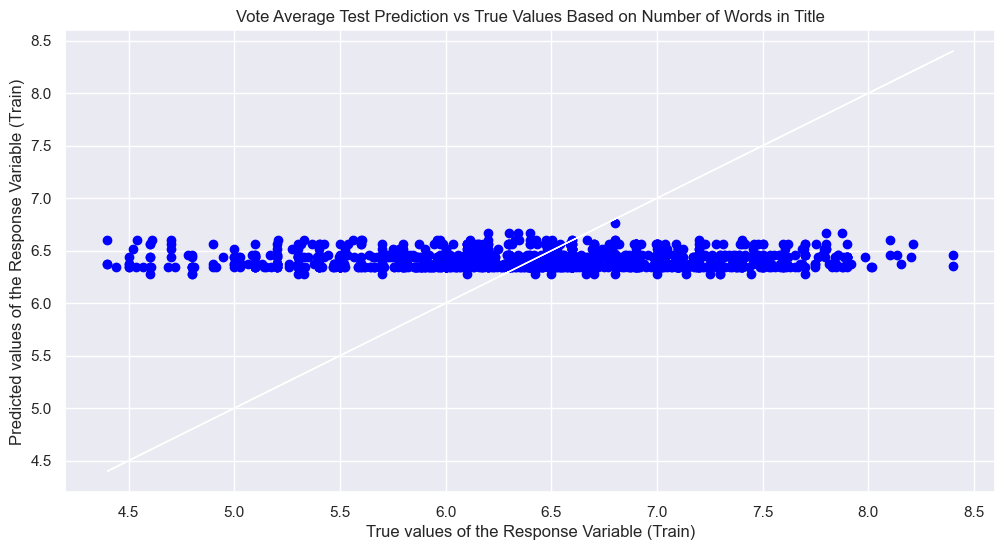

average_title_word_length vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.03483329407019076
Mean Squared Error (MSE) 	: 0.5582022335757856

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.025290159556814018
Mean Squared Error (MSE) 	: 0.5490015312192047



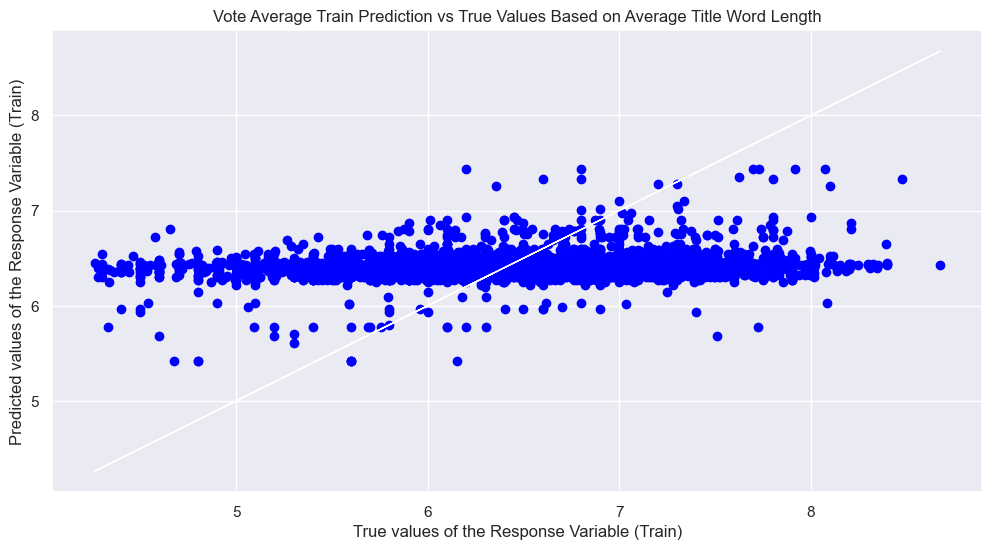

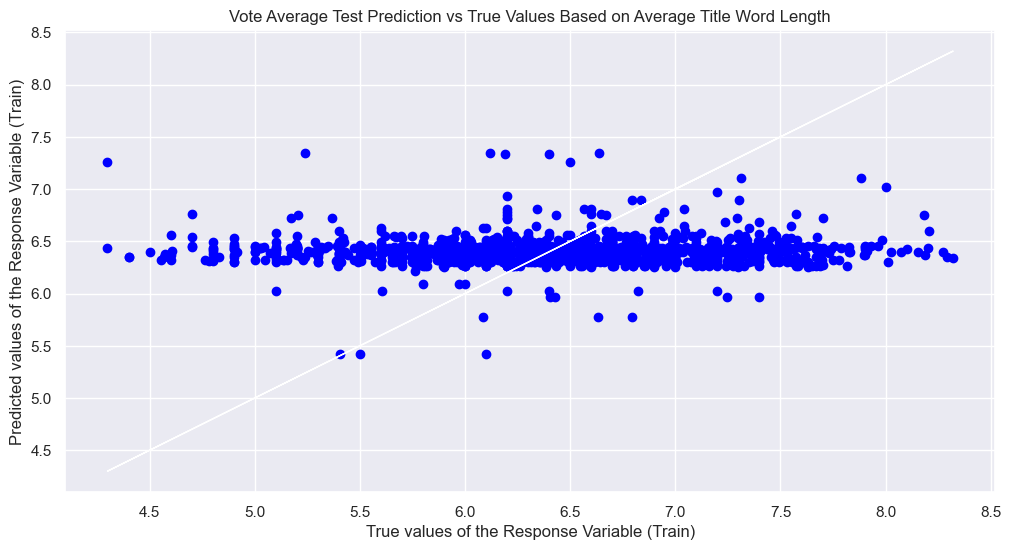

In [136]:
title_sentiment_random_forest = generateRandomForestRegressor(data, "title_sentiment", "vote_average", 200, 0)
generatePredictVsTruePlot(title_sentiment_random_forest['response_train'], title_sentiment_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Title Sentiment")
generatePredictVsTruePlot(title_sentiment_random_forest['response_test'], title_sentiment_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Title Sentiment")

overview_sentiment_random_forest = generateRandomForestRegressor(data, "overview_sentiment", "vote_average", 200, 0)
generatePredictVsTruePlot(overview_sentiment_random_forest['response_train'], overview_sentiment_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Overview Sentiment")
generatePredictVsTruePlot(overview_sentiment_random_forest['response_test'], overview_sentiment_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Overview Sentiment")

title_length_random_forest = generateRandomForestRegressor(data, "title_length", "vote_average", 200, 0)
generatePredictVsTruePlot(title_length_random_forest['response_train'], title_length_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Title Length")
generatePredictVsTruePlot(title_length_random_forest['response_test'], title_length_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Title Length")

num_words_in_title_random_forest = generateRandomForestRegressor(data, "num_words_in_title", "vote_average", 200, 0)
generatePredictVsTruePlot(num_words_in_title_random_forest['response_train'], num_words_in_title_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Number of Words in Title")
generatePredictVsTruePlot(num_words_in_title_random_forest['response_test'], num_words_in_title_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Number of Words in Title")

average_title_word_length_random_forest = generateRandomForestRegressor(data, "average_title_word_length", "vote_average", 200, 0)
generatePredictVsTruePlot(average_title_word_length_random_forest['response_train'], average_title_word_length_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Average Title Word Length")
generatePredictVsTruePlot(average_title_word_length_random_forest['response_test'], average_title_word_length_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Average Title Word Length")

## Multi-Variate Predictor vs. Vote Average

['title_sentiment', 'overview_sentiment', 'title_length', 'num_words_in_title', 'average_title_word_length', 'made_up_word_count'] vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8000417284024481
Mean Squared Error (MSE) 	: 0.11665950457830754

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.1804865340253725
Mean Squared Error (MSE) 	: 0.6148726802557407



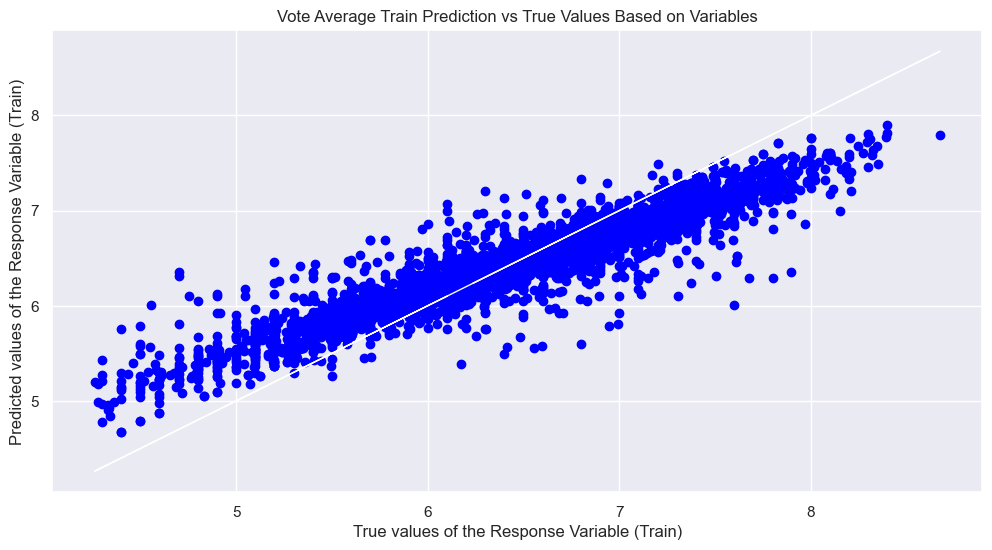

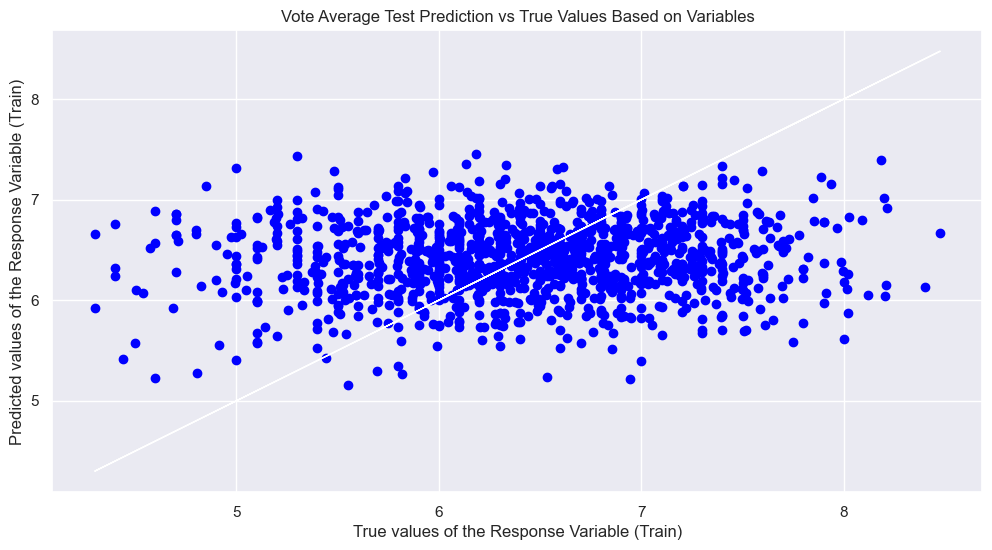

In [145]:
multi_variate_random_forest = generateRandomForestRegressor(data, ['title_sentiment','overview_sentiment','title_length','num_words_in_title','average_title_word_length','made_up_word_count'], "vote_average", 200, 0)
generatePredictVsTruePlot(multi_variate_random_forest['response_train'], multi_variate_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Variables")
generatePredictVsTruePlot(multi_variate_random_forest['response_test'], multi_variate_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Variables")

## Predictor vs. Popularity

title_sentiment vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.03226879559595375
Mean Squared Error (MSE) 	: 32.78924073264128

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.03484543026268838
Mean Squared Error (MSE) 	: 33.07408650356686



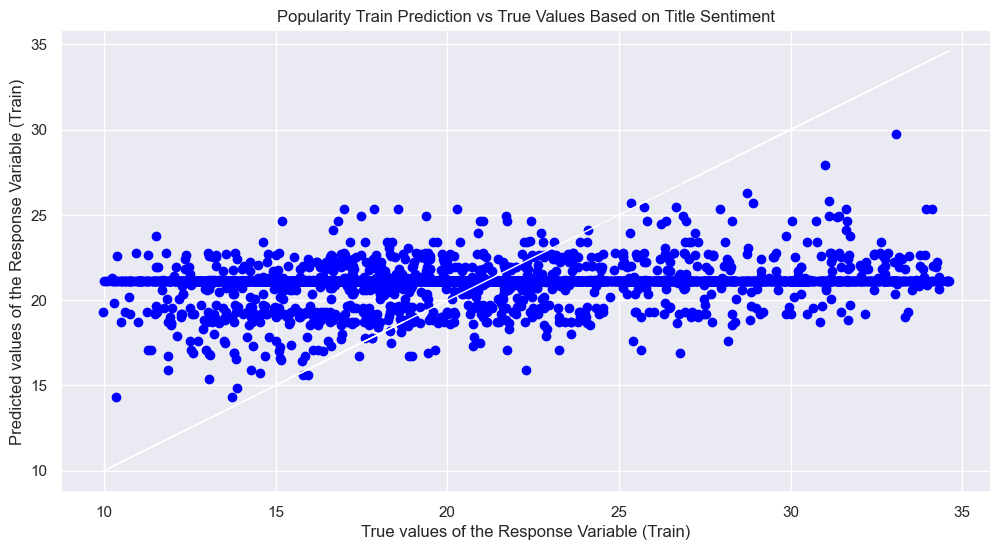

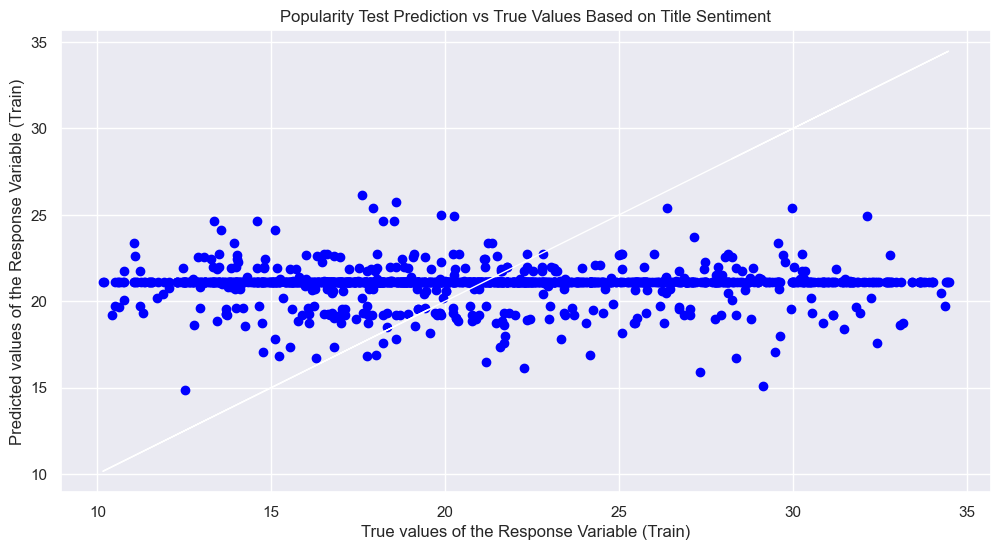

overview_sentiment vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.21126851814695446
Mean Squared Error (MSE) 	: 26.02800283510264

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.14402503622292495
Mean Squared Error (MSE) 	: 39.60973940735825



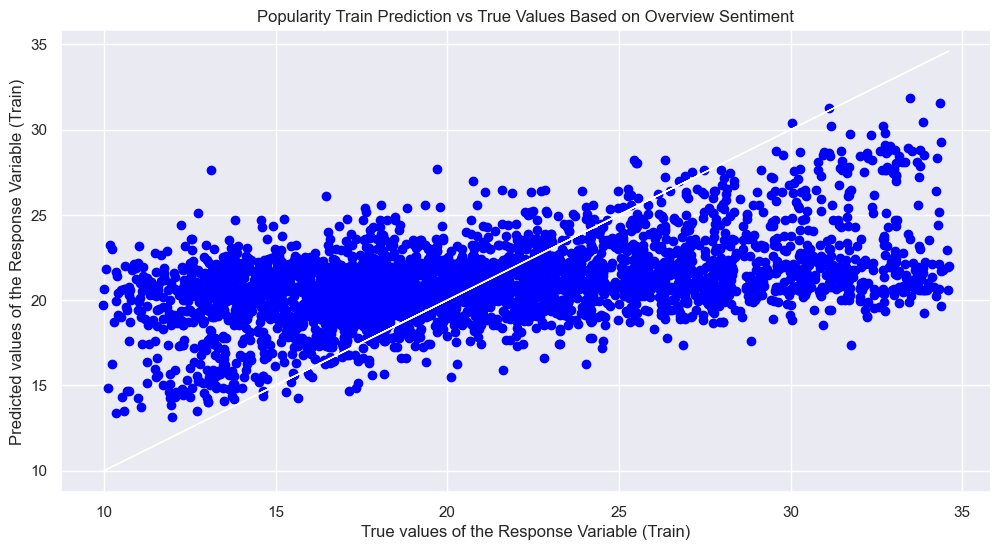

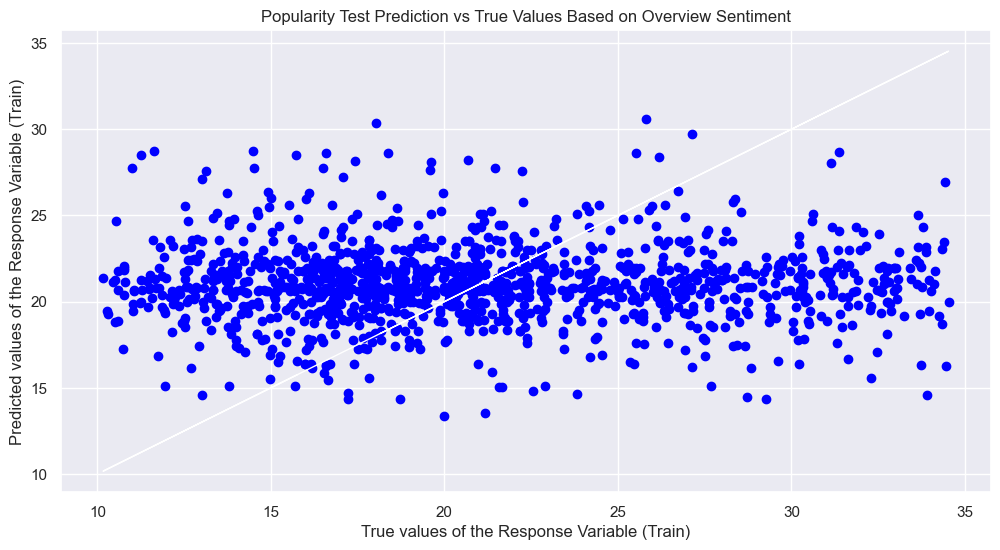

title_length vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.013065577816503415
Mean Squared Error (MSE) 	: 33.20888161942441

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.015337694594705908
Mean Squared Error (MSE) 	: 33.17657157991186



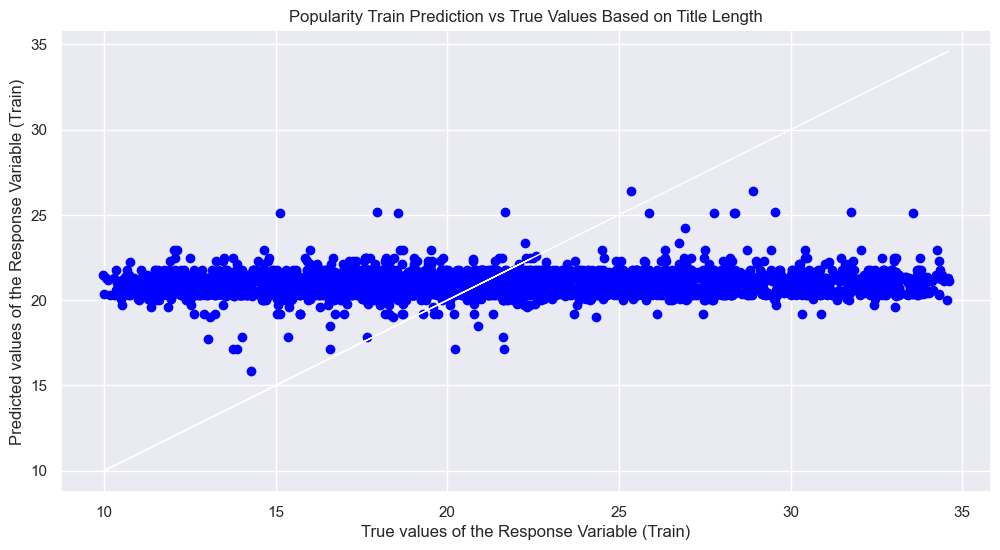

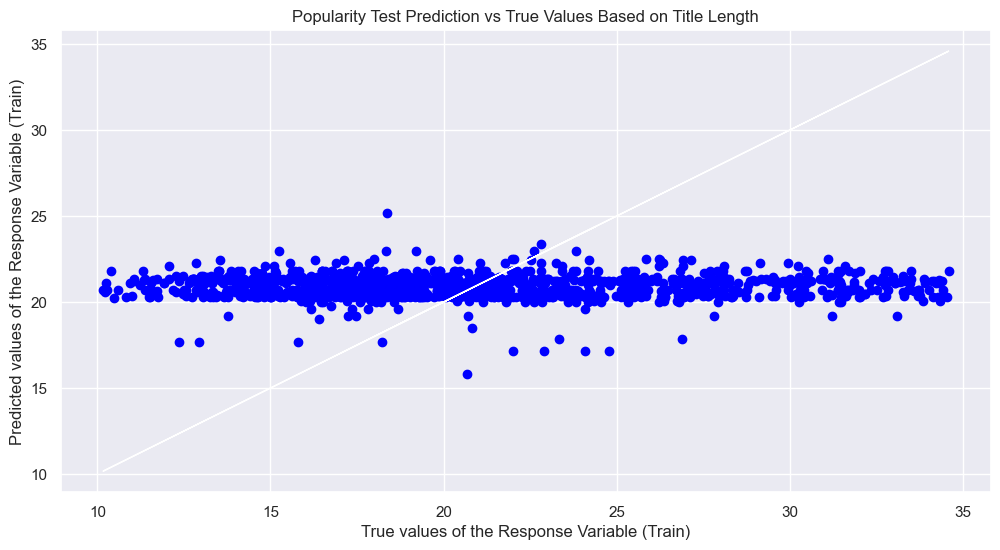

num_words_in_title vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0035631848275994304
Mean Squared Error (MSE) 	: 33.718140359780676

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0132472465608513
Mean Squared Error (MSE) 	: 32.308873297316126



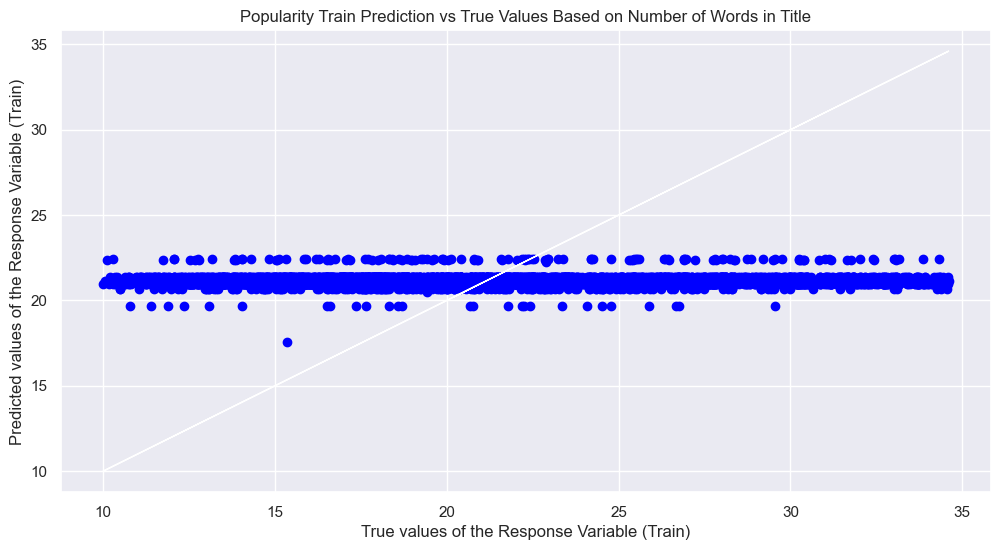

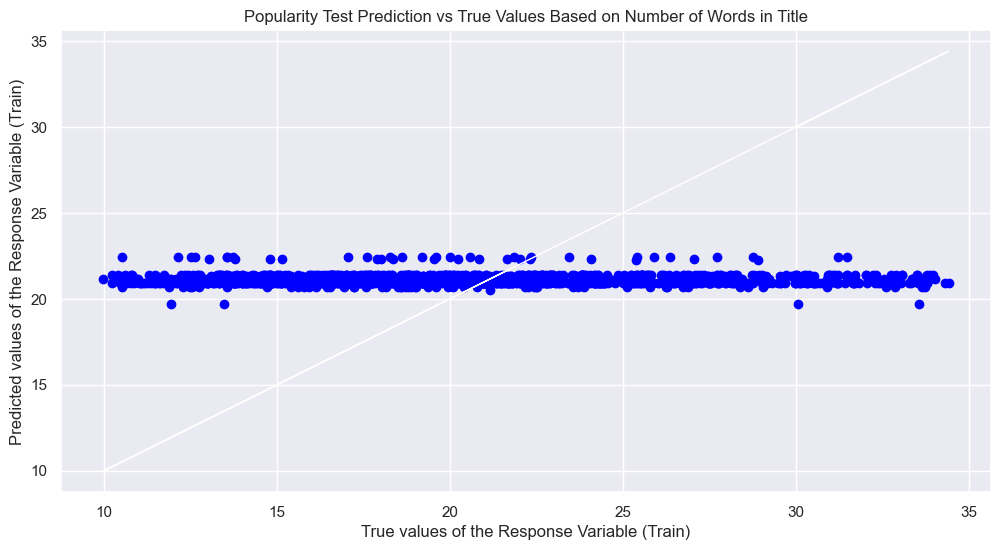

average_title_word_length vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.028093683592739338
Mean Squared Error (MSE) 	: 31.884937391752374

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.026448739406810695
Mean Squared Error (MSE) 	: 36.09971530443982



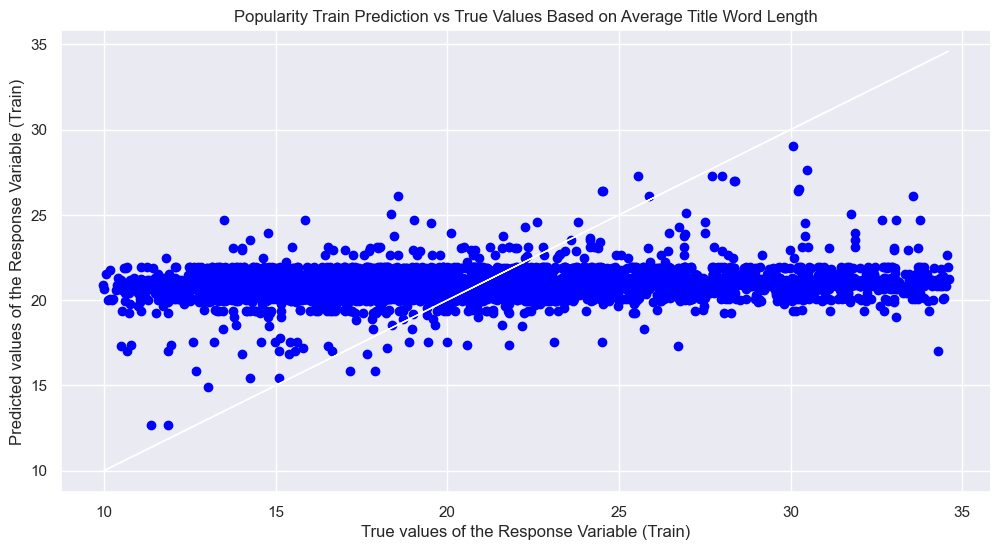

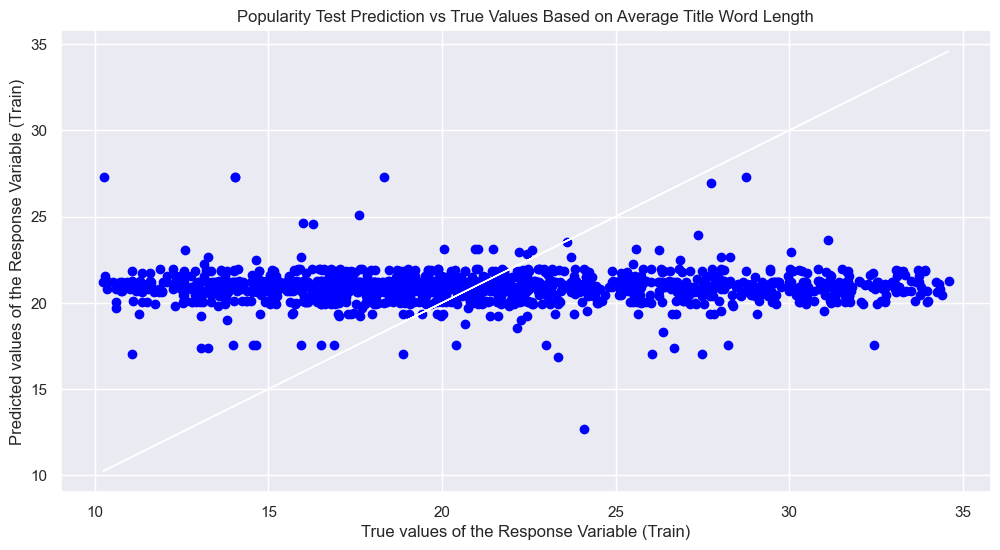

In [137]:
title_sentiment_random_forest = generateRandomForestRegressor(data, "title_sentiment", "popularity", 200, 0)
generatePredictVsTruePlot(title_sentiment_random_forest['response_train'], title_sentiment_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Title Sentiment")
generatePredictVsTruePlot(title_sentiment_random_forest['response_test'], title_sentiment_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Title Sentiment")

overview_sentiment_random_forest = generateRandomForestRegressor(data, "overview_sentiment", "popularity", 200, 0)
generatePredictVsTruePlot(overview_sentiment_random_forest['response_train'], overview_sentiment_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Overview Sentiment")
generatePredictVsTruePlot(overview_sentiment_random_forest['response_test'], overview_sentiment_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Overview Sentiment")

title_length_random_forest = generateRandomForestRegressor(data, "title_length", "popularity", 200, 0)
generatePredictVsTruePlot(title_length_random_forest['response_train'], title_length_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Title Length")
generatePredictVsTruePlot(title_length_random_forest['response_test'], title_length_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Title Length")

num_words_in_title_random_forest = generateRandomForestRegressor(data, "num_words_in_title", "popularity", 200, 0)
generatePredictVsTruePlot(num_words_in_title_random_forest['response_train'], num_words_in_title_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Number of Words in Title")
generatePredictVsTruePlot(num_words_in_title_random_forest['response_test'], num_words_in_title_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Number of Words in Title")

average_title_word_length_random_forest = generateRandomForestRegressor(data, "average_title_word_length", "popularity", 200, 0)
generatePredictVsTruePlot(average_title_word_length_random_forest['response_train'], average_title_word_length_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Average Title Word Length")
generatePredictVsTruePlot(average_title_word_length_random_forest['response_test'], average_title_word_length_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Average Title Word Length")

## Multi-Variate Predictor vs. Popularity

['title_sentiment', 'overview_sentiment', 'title_length', 'num_words_in_title', 'average_title_word_length', 'made_up_word_count'] vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7747156689631597
Mean Squared Error (MSE) 	: 7.586568817655428

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.13465327241915293
Mean Squared Error (MSE) 	: 36.975278596734476



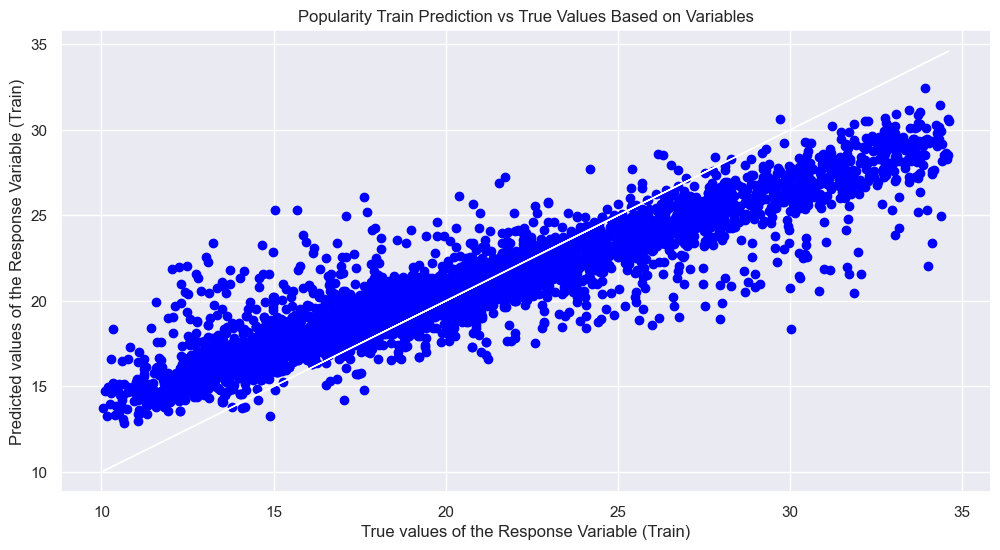

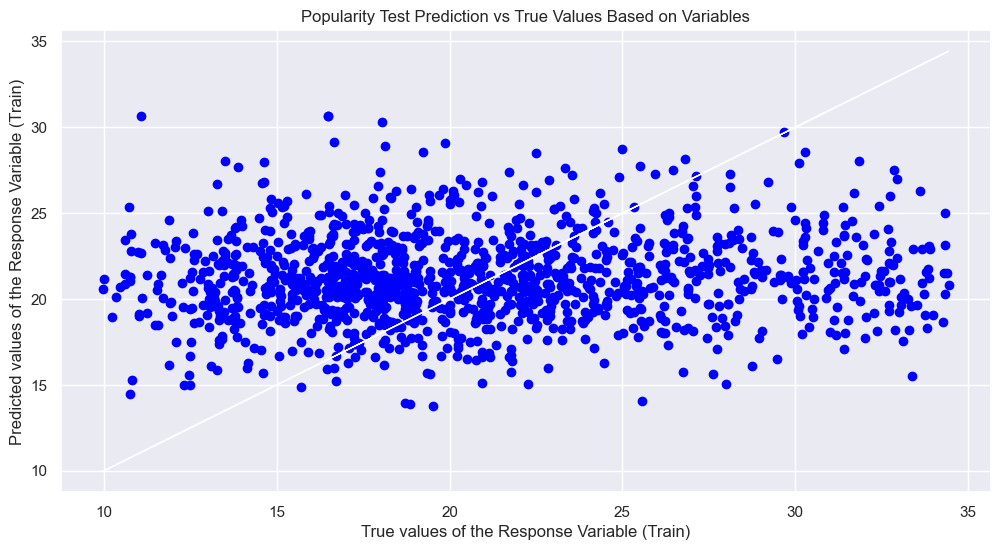

In [146]:
multi_variate_random_forest = generateRandomForestRegressor(data, ['title_sentiment','overview_sentiment','title_length','num_words_in_title','average_title_word_length','made_up_word_count'], "popularity", 200, 0)
generatePredictVsTruePlot(multi_variate_random_forest['response_train'], multi_variate_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Variables")
generatePredictVsTruePlot(multi_variate_random_forest['response_test'], multi_variate_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Variables")

# Classification Tree

vote_average vs. has_made_up_word with depth 60


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Classification Accuracy 	: 0.8775457592162929
Test Classification Accuracy 	: 0.888631090487239
Train Confusion Matrix
True Positive Rate: 0.28728414442700156
False Positive Rate: 0.006477483035163479
True Negative Rate: 0.9935225169648365
False Negative Rate: 0.7127158555729984
Test Confusion Matrix
True Positive Rate: 0.3598130841121495
False Positive Rate: 0.006487488415199258
True Negative Rate: 0.9935125115848007
False Negative Rate: 0.6401869158878505


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


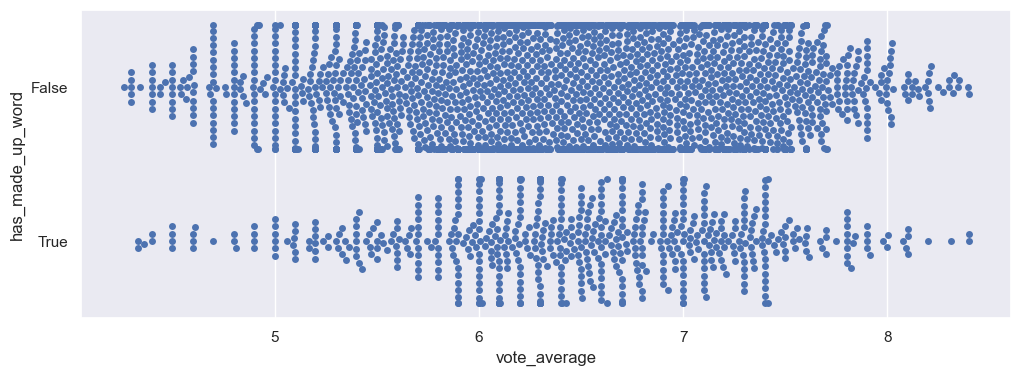

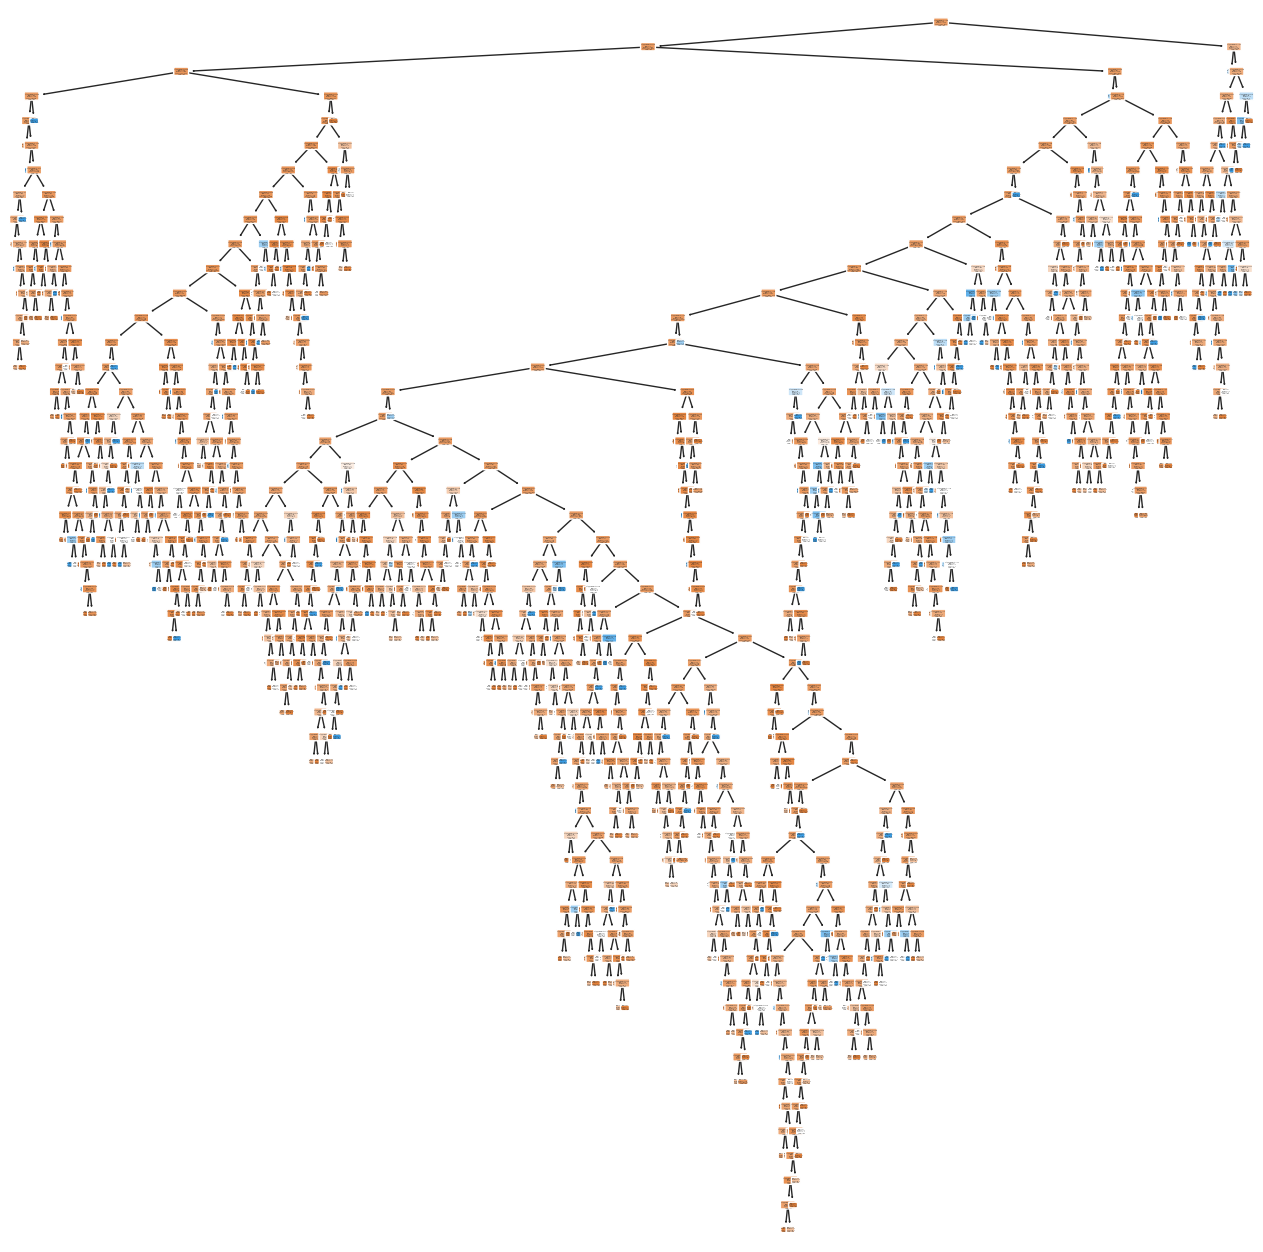

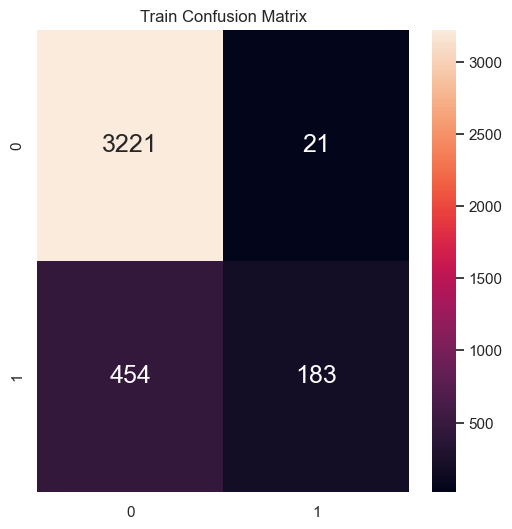

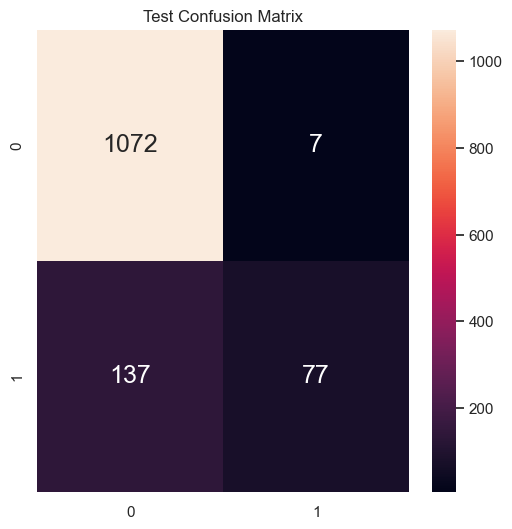

In [21]:
has_made_up_word_class_tree = generateClassificationTree(data,"vote_average",  "has_made_up_word", 60, ["No", "Yes"])
generateConfusionMatrix(has_made_up_word_class_tree['response_train'], has_made_up_word_class_tree['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_class_tree['response_test'], has_made_up_word_class_tree['response_test_pred'], "Test Confusion Matrix")

# Random Forest Classifier

vote_average vs. has_made_up_word with depth 80
Train Classification Accuracy 	: 0.8878576952822892
Test Classification Accuracy 	: 0.8012374323279196
Train Confusion Matrix
True Positive Rate: 0.37715179968701096
False Positive Rate: 0.011419753086419753
True Negative Rate: 0.9885802469135803
False Negative Rate: 0.622848200312989
Test Confusion Matrix
True Positive Rate: 0.08962264150943396
False Positive Rate: 0.05920444033302498
True Negative Rate: 0.940795559666975
False Negative Rate: 0.910377358490566


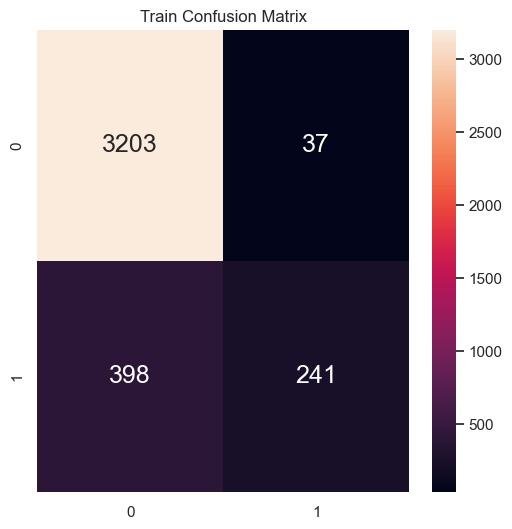

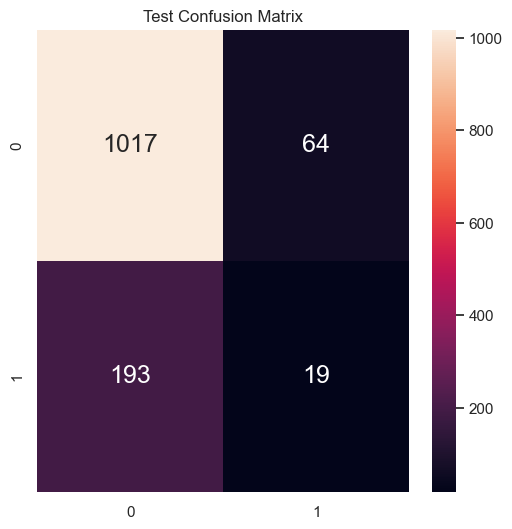

In [24]:
has_made_up_word_random_forest = generateRandomForestClassifier(data, "vote_average", "has_made_up_word", 150, 80)
generateConfusionMatrix(has_made_up_word_random_forest['response_train'], has_made_up_word_random_forest['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_random_forest['response_test'], has_made_up_word_random_forest['response_test_pred'], "Test Confusion Matrix")